### NLP
### Assignment 1

### 1. Libraries

In [19]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request

#### Helper custom fuctions


In [24]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue

                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path) as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

#### Donwload the data from the following link and read the data from the file.

In [27]:
# Dowload the data from the source

helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)

helper.download_dataset()
df = helper.read_dataset('dataset')
df.head()


,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


### 2. Data Analysis

In [28]:
df['label'].value_counts()


label
0    27256
1     1387
Name: count, dtype: int64

In [29]:
# check for missing values

df.isnull().sum()

text     0
label    0
dtype: int64

In [30]:
# check for duplicate values
df.duplicated().sum()

352

In [31]:
# check for the distribution of the labels
df['label'].value_counts()

label
0    27256
1     1387
Name: count, dtype: int64

In [32]:
# check for all the special characters
df['text'].str.extractall(r'([^a-zA-Z\s])')[0].value_counts()


0
.    27248
,    16314
'     7006
!     6092
?     3846
     ...  
μ        1
ύ        1
ď        1
ז        1
ú        1
Name: count, Length: 257, dtype: int64

In [36]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.head()



,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18
2,But it's ok....because Europe will soon rebel ...,1,24,132,6,0,3,98,14,21
3,I forsee a big civil war in Europe in the futu...,0,18,94,2,0,3,71,8,16
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,8,55,1,0,10,35,1,8


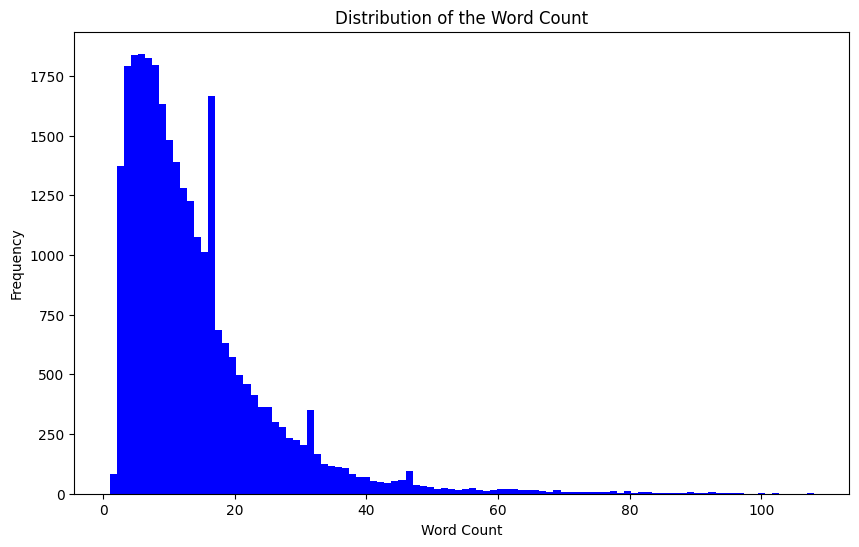

In [37]:
# Plot the distribution of the word count

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

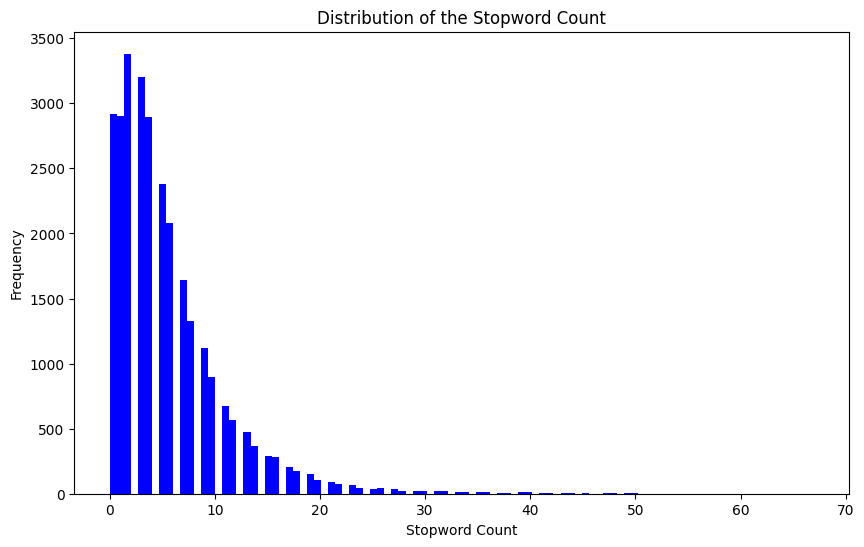

In [38]:
# Plot the distribution of the stopword count

In [50]:
# Apply bag of words to the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df['text']).toarray()


In [51]:
cv.get_feature_names_out()

array(['00', '000', '004', ..., 'ٱلز', 'ٱلس', 'ٱلل'], dtype=object)

In [52]:
feature_names = cv.get_feature_names_out()
pd.DataFrame(bag_of_words, columns = feature_names)

,00,000,004,005,008,009,01,0131,02,03,...,يمكن,ين,يه,يهودية,يوميا,ٱل,ٱلذ,ٱلز,ٱلس,ٱلل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perform Clean up and data analysis